# Aula 10 - Intrudução ao Pandas - II
## Prof. Luis Lamas

Acompanhe os vídeos no canal do SMART Research Group:
https://www.youtube.com/channel/UCvV5eUanrGET9LWPB8jzWQw

Nessa aula vamos analisar um programa que utiliza algumas funções intermediárias de Python

https://pandas.pydata.org/

### Importação das Bibliotecas relevantes

In [1]:
import pandas as pd
import os.path
import urllib
import datetime
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Dados a serem baixados da internet

In [2]:
# https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/arquivos-producao-de-petroleo-e-gas-natural-nacional/pm/

FileList = [
    'https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/arquivos-producao-de-petroleo-e-gas-natural-nacional/pm/producao-mar-2021-1.csv/@@download/file/producao-mar-2021.csv',
    'https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/arquivos-producao-de-petroleo-e-gas-natural-nacional/pm/producao-mar-2020.csv/@@download/file/producao-mar-2020.csv',
    'https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/arquivos-producao-de-petroleo-e-gas-natural-nacional/pm/producao-mar-2019.csv/@@download/file/producao-mar-2019.csv']


### Função para pré-processar arquivos de dados

In [3]:
def RetrieveData(url):
    filename = url.split(sep='/')[-1]
    filename_cleaned = filename.split(sep='.')[0] + '_cleaned.csv'
    
    if os.path.exists(filename) == False:
        urllib.request.urlretrieve (url, filename)
        with open(filename, mode='r', encoding='utf-8') as f, open(filename_cleaned, mode='w', encoding='utf-8') as f1:
            # Lê as linhas
            try:
                lines = f.readlines()
            except:
                f = open(filename, mode='r', encoding='latin-1')
                lines = f.readlines()
        
            # Processa cada linha
            for line in lines:
                # Remove marcador de linhas novas
                line = line.strip()

                # Busca linhas iniciando e terminando com " e extrai esses caracteres
                if (line.startswith('"') == True) and (line.endswith('"') == True):
                    line = line[1:-1]
                    
                line = line.replace('""', '"')
                f1.writelines(line + '\n')

    df1 = pd.read_csv(filename_cleaned, decimal=',' , encoding='utf-8', quotechar='"')
    
    return df1

In [4]:
#df_test = RetrieveData(FileList[0])
#df_test.head()

### Ler todos os arquivos para um mesmo Data Frame

In [5]:
for url in FileList:
    try:
        df = pd.concat([df, RetrieveData(url)])
    except:
        df = RetrieveData(url)
    print(url + ' OK!!!')


https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/arquivos-producao-de-petroleo-e-gas-natural-nacional/pm/producao-mar-2021-1.csv/@@download/file/producao-mar-2021.csv OK!!!
https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/arquivos-producao-de-petroleo-e-gas-natural-nacional/pm/producao-mar-2020.csv/@@download/file/producao-mar-2020.csv OK!!!
https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/arquivos-producao-de-petroleo-e-gas-natural-nacional/pm/producao-mar-2019.csv/@@download/file/producao-mar-2019.csv OK!!!


In [6]:
df.head()

,Ano,Mês/Ano,Estado,Bacia,Campo,Poço,Ambiente,Instalação,Produção de Óleo (m³),Produção de Condensado (m³),...,Produção de Gás Não Associado (Mm³),Produção de Água (m³),Injeção de Gás (Mm³),Injeção de Água para Recuperação Secundária (m³),Injeção de Água para Descarte (m³),Injeção de Gás Carbônico (Mm³),Injeção de Nitrogênio (Mm³),Injeção de Vapor de Água (t),Injeção de Polímeros (m³),Injeção de Outros Fluidos (m³)
0,2021,01/2021,Alagoas,Alagoas,PARU,4-ALS-39-AL,Mar,Estação de Paru,0.0,279.931,...,4424.25429,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021,01/2021,Bahia,Camamu,MANATI,7-MNT-1-BAS,Mar,PLATAFORMA DE MANATI 1,0.0,205.809,...,16807.71810,84.038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,01/2021,Bahia,Camamu,MANATI,7-MNT-2-BAS,Mar,PLATAFORMA DE MANATI 1,0.0,287.786,...,18016.21323,91.881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,01/2021,Bahia,Camamu,MANATI,7-MNT-3-BAS,Mar,PLATAFORMA DE MANATI 1,0.0,178.387,...,12287.16322,70.037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021,01/2021,Bahia,Camamu,MANATI,7-MNT-4-BAS,Mar,PLATAFORMA DE MANATI 1,0.0,227.212,...,14445.87643,88.118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.columns

Index(['Ano', 'Mês/Ano', 'Estado', 'Bacia', 'Campo', 'Poço', 'Ambiente',
       'Instalação', 'Produção de Óleo (m³)', 'Produção de Condensado (m³)',
       'Produção de Gás Associado (Mm³)',
       'Produção de Gás Não Associado (Mm³)', 'Produção de Água (m³)',
       'Injeção de Gás (Mm³)',
       'Injeção de Água para Recuperação Secundária (m³)',
       'Injeção de Água para Descarte (m³)', 'Injeção de Gás Carbônico (Mm³)',
       'Injeção de Nitrogênio (Mm³)', 'Injeção de Vapor de Água (t)',
       'Injeção de Polímeros (m³)', 'Injeção de Outros Fluidos (m³)'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52873 entries, 0 to 22172
Data columns (total 21 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Ano                                               52873 non-null  int64  
 1   Mês/Ano                                           52873 non-null  object 
 2   Estado                                            52873 non-null  object 
 3   Bacia                                             52873 non-null  object 
 4   Campo                                             52873 non-null  object 
 5   Poço                                              52873 non-null  object 
 6   Ambiente                                          52873 non-null  object 
 7   Instalação                                        52873 non-null  object 
 8   Produção de Óleo (m³)                             40971 non-null  float64
 9   Produção de Conde

In [9]:
df.describe()

,Ano,Produção de Óleo (m³),Produção de Condensado (m³),Produção de Gás Associado (Mm³),Produção de Gás Não Associado (Mm³),Produção de Água (m³),Injeção de Gás (Mm³),Injeção de Água para Recuperação Secundária (m³),Injeção de Água para Descarte (m³),Injeção de Gás Carbônico (Mm³),Injeção de Nitrogênio (Mm³),Injeção de Vapor de Água (t),Injeção de Polímeros (m³),Injeção de Outros Fluidos (m³)
count,52873.000000,40971.000000,40971.000000,40971.000000,40971.000000,40971.000000,12342.000000,12342.000000,12342.0,12342.000000,12342.0,12342.0,12342.000000,12342.0
mean,2019.748681,9463.644210,18.940584,2017.703908,236.157434,5950.039493,3105.494582,38296.932198,0.0,681.125653,0.0,0.0,0.088486,0.0
std,0.724055,26433.809126,237.608475,6979.739982,2472.393623,16179.868669,12822.844157,60357.353915,0.0,3167.463105,0.0,0.0,3.645873,0.0
min,2019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
25%,2019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,133.427475,0.0,0.000000,0.0,0.0,0.000000,0.0
50%,2020.000000,93.916580,0.000000,3.759760,0.000000,3.383780,0.000000,5038.008110,0.0,0.000000,0.0,0.0,0.000000,0.0
75%,2020.000000,5674.575000,0.000000,536.562570,0.000000,2018.054920,0.000000,56924.484200,0.0,0.000000,0.0,0.0,0.000000,0.0
max,2021.000000,276466.008040,7608.173000,92450.687090,64145.835690,258875.633890,98091.990000,316799.500000,0.0,39271.996200,0.0,0.0,224.080000,0.0


### Converte os valores da coluna Mês/Ano para formato de data

In [10]:
df['Data'] = pd.to_datetime(df['Mês/Ano'], format='%m/%Y')
df['Data'].head()

0   2021-01-01
1   2021-01-01
2   2021-01-01
3   2021-01-01
4   2021-01-01
Name: Data, dtype: datetime64[ns]

In [11]:
df.drop(['Mês/Ano'], axis=1, inplace=True)

### Muda a sequência das colunas

In [12]:
df.columns

Index(['Ano', 'Estado', 'Bacia', 'Campo', 'Poço', 'Ambiente', 'Instalação',
       'Produção de Óleo (m³)', 'Produção de Condensado (m³)',
       'Produção de Gás Associado (Mm³)',
       'Produção de Gás Não Associado (Mm³)', 'Produção de Água (m³)',
       'Injeção de Gás (Mm³)',
       'Injeção de Água para Recuperação Secundária (m³)',
       'Injeção de Água para Descarte (m³)', 'Injeção de Gás Carbônico (Mm³)',
       'Injeção de Nitrogênio (Mm³)', 'Injeção de Vapor de Água (t)',
       'Injeção de Polímeros (m³)', 'Injeção de Outros Fluidos (m³)', 'Data'],
      dtype='object')

In [13]:
new_cols = ['Data', 'Ano', 'Estado', 'Bacia', 'Campo', 'Poço', 'Ambiente', 'Instalação',
       'Produção de Óleo (m³)', 'Produção de Condensado (m³)',
       'Produção de Gás Associado (Mm³)',
       'Produção de Gás Não Associado (Mm³)', 'Produção de Água (m³)',
       'Injeção de Gás (Mm³)',
       'Injeção de Água para Recuperação Secundária (m³)',
       'Injeção de Água para Descarte (m³)', 'Injeção de Gás Carbônico (Mm³)',
       'Injeção de Nitrogênio (Mm³)', 'Injeção de Vapor de Água (t)',
       'Injeção de Polímeros (m³)', 'Injeção de Outros Fluidos (m³)']

df = df[new_cols]
df.head()

,Data,Ano,Estado,Bacia,Campo,Poço,Ambiente,Instalação,Produção de Óleo (m³),Produção de Condensado (m³),...,Produção de Gás Não Associado (Mm³),Produção de Água (m³),Injeção de Gás (Mm³),Injeção de Água para Recuperação Secundária (m³),Injeção de Água para Descarte (m³),Injeção de Gás Carbônico (Mm³),Injeção de Nitrogênio (Mm³),Injeção de Vapor de Água (t),Injeção de Polímeros (m³),Injeção de Outros Fluidos (m³)
0,2021-01-01,2021,Alagoas,Alagoas,PARU,4-ALS-39-AL,Mar,Estação de Paru,0.0,279.931,...,4424.25429,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-01,2021,Bahia,Camamu,MANATI,7-MNT-1-BAS,Mar,PLATAFORMA DE MANATI 1,0.0,205.809,...,16807.71810,84.038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01-01,2021,Bahia,Camamu,MANATI,7-MNT-2-BAS,Mar,PLATAFORMA DE MANATI 1,0.0,287.786,...,18016.21323,91.881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-01,2021,Bahia,Camamu,MANATI,7-MNT-3-BAS,Mar,PLATAFORMA DE MANATI 1,0.0,178.387,...,12287.16322,70.037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-01-01,2021,Bahia,Camamu,MANATI,7-MNT-4-BAS,Mar,PLATAFORMA DE MANATI 1,0.0,227.212,...,14445.87643,88.118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Altera o índice do Data Frame

In [14]:
df.set_index('Data', inplace = True)

### Seleciona apenas dos dados de um campo

In [15]:
df_sph = df[df['Campo'] == 'SAPINHOÁ']
df_sph.head()

,Ano,Estado,Bacia,Campo,Poço,Ambiente,Instalação,Produção de Óleo (m³),Produção de Condensado (m³),Produção de Gás Associado (Mm³),Produção de Gás Não Associado (Mm³),Produção de Água (m³),Injeção de Gás (Mm³),Injeção de Água para Recuperação Secundária (m³),Injeção de Água para Descarte (m³),Injeção de Gás Carbônico (Mm³),Injeção de Nitrogênio (Mm³),Injeção de Vapor de Água (t),Injeção de Polímeros (m³),Injeção de Outros Fluidos (m³)
Data,,,,,,,,,,,,,,,,,,,,
2021-01-01,2021,São Paulo,Santos,SAPINHOÁ,1-BRSA-594-SPS,Mar,Não Informado,0.00000,0.0,0.00000,0.0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01,2021,São Paulo,Santos,SAPINHOÁ,3-BRSA-788-SPS,Mar,FPSO CIDADE DE ILHA BELA,98357.56660,0.0,24491.91808,0.0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01,2021,São Paulo,Santos,SAPINHOÁ,3-BRSA-923A-SPS,Mar,FPSO CIDADE DE SÃO PAULO,NaN,NaN,NaN,NaN,NaN,6934.62242,0.0,0.0,2303.93441,0.0,0.0,0.0,0.0
2021-01-01,2021,São Paulo,Santos,SAPINHOÁ,7-SPH-1-SPS,Mar,FPSO CIDADE DE SÃO PAULO,98905.88147,0.0,22000.06558,0.0,31351.04628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01,2021,São Paulo,Santos,SAPINHOÁ,7-SPH-14D-SPS,Mar,FPSO CIDADE DE ILHA BELA,97021.26154,0.0,35887.73518,0.0,11231.17682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df_sph['Poço'].unique().size

29

### Plota a produção para um poço

<AxesSubplot:xlabel='Data'>

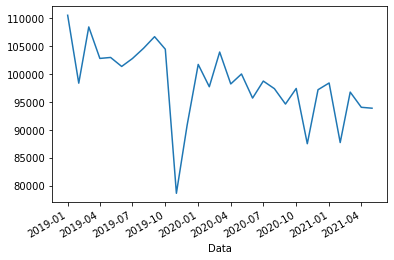

In [17]:
df_aux = df_sph[df_sph['Poço'] == '3-BRSA-788-SPS']
df_aux['Produção de Óleo (m³)'].plot()

### Cria coluna para produção acumulada

In [18]:
df_aux.sort_index(inplace=True)

In [19]:
df_aux['ProdAcumulada'] = df_aux['Produção de Óleo (m³)'].cumsum()
df_aux.head()

,Ano,Estado,Bacia,Campo,Poço,Ambiente,Instalação,Produção de Óleo (m³),Produção de Condensado (m³),Produção de Gás Associado (Mm³),...,Produção de Água (m³),Injeção de Gás (Mm³),Injeção de Água para Recuperação Secundária (m³),Injeção de Água para Descarte (m³),Injeção de Gás Carbônico (Mm³),Injeção de Nitrogênio (Mm³),Injeção de Vapor de Água (t),Injeção de Polímeros (m³),Injeção de Outros Fluidos (m³),ProdAcumulada
Data,,,,,,,,,,,,,,,,,,,,,
2019-01-01,2019,São Paulo,Santos,SAPINHOÁ,3-BRSA-788-SPS,Mar,FPSO CIDADE DE ILHA BELA,110483.07902,0.0,32159.89553,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110483.07902
2019-02-01,2019,São Paulo,Santos,SAPINHOÁ,3-BRSA-788-SPS,Mar,FPSO CIDADE DE ILHA BELA,98326.33856,0.0,28728.53449,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,208809.41758
2019-03-01,2019,São Paulo,Santos,SAPINHOÁ,3-BRSA-788-SPS,Mar,FPSO CIDADE DE ILHA BELA,108393.70413,0.0,29684.75399,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,317203.12171
2019-04-01,2019,São Paulo,Santos,SAPINHOÁ,3-BRSA-788-SPS,Mar,FPSO CIDADE DE ILHA BELA,102755.24771,0.0,27089.16553,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,419958.36942
2019-05-01,2019,São Paulo,Santos,SAPINHOÁ,3-BRSA-788-SPS,Mar,FPSO CIDADE DE ILHA BELA,102929.46293,0.0,28277.60184,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,522887.83235


### Plota gráficos para todos os poços

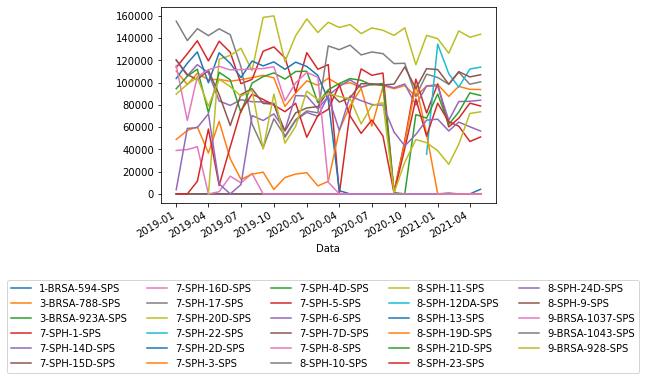

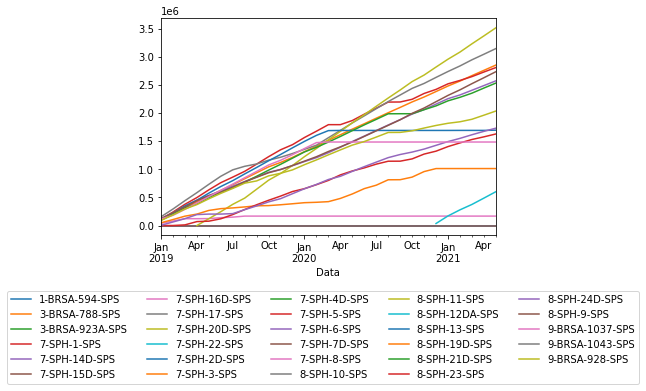

In [20]:
for Poço in df_sph['Poço'].unique():
    df_aux = df_sph[df_sph['Poço'] == Poço]
    plt.figure(1)
    df_aux['Produção de Óleo (m³)'].plot(label = Poço)

    df_aux.sort_index(inplace=True)
    plt.figure(2)
    df_aux['ProdAcumulada'] = df_aux['Produção de Óleo (m³)'].cumsum()
    df_aux['ProdAcumulada'].plot(label = Poço)

    
plt.figure(1).legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=5)
plt.figure(2).legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=5)


### Seleciona dados de produção para o campo

In [21]:
colunas = ['Produção de Óleo (m³)', 'Produção de Condensado (m³)',
       'Produção de Gás Associado (Mm³)',
       'Produção de Gás Não Associado (Mm³)', 'Produção de Água (m³)']

df_campo = df_sph.groupby('Data')[colunas].sum()


In [22]:
df_campo['Produção de Óleo (m³)'] = df_campo['Produção de Óleo (m³)'] + df_campo['Produção de Condensado (m³)']
df_campo['Produção de Gás (Mm³)'] = df_campo['Produção de Gás Associado (Mm³)'] + df_campo['Produção de Gás Não Associado (Mm³)']

df_campo.drop(['Produção de Condensado (m³)', 'Produção de Gás Associado (Mm³)', 'Produção de Gás Não Associado (Mm³)'], axis=1, inplace=True)

In [23]:
df_campo.head()


,Produção de Óleo (m³),Produção de Água (m³),Produção de Gás (Mm³)
Data,,,
2019-01-01,1.115523e+06,27477.21870,286218.00455
2019-02-01,1.119341e+06,38019.97889,283968.71015
2019-03-01,1.237235e+06,43588.69896,319587.26424
2019-04-01,1.115202e+06,44773.77658,286829.97157
2019-05-01,1.220330e+06,36758.24548,322224.00290


<AxesSubplot:xlabel='Data'>

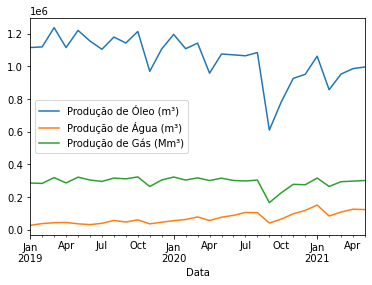

In [24]:
df_campo.plot()